In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
c= sns.load_dataset('car_crashes')
c.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [4]:
X=c.iloc[:,1:6]
X.head(3)

,speeding,alcohol,not_distracted,no_previous,ins_premium
0,7.332,5.640,18.048,15.040,784.55
1,7.421,4.525,16.290,17.014,1053.48
2,6.510,5.208,15.624,17.856,899.47


In [5]:
y=c["total"]
y

0     18.8
1     18.1
2     18.6
3     22.4
4     12.0
5     13.6
6     10.8
7     16.2
8      5.9
9     17.9
10    15.6
11    17.5
12    15.3
13    12.8
14    14.5
15    15.7
16    17.8
17    21.4
18    20.5
19    15.1
20    12.5
21     8.2
22    14.1
23     9.6
24    17.6
25    16.1
26    21.4
27    14.9
28    14.7
29    11.6
30    11.2
31    18.4
32    12.3
33    16.8
34    23.9
35    14.1
36    19.9
37    12.8
38    18.2
39    11.1
40    23.9
41    19.4
42    19.5
43    19.4
44    11.3
45    13.6
46    12.7
47    10.6
48    23.8
49    13.8
50    17.4
Name: total, dtype: float64

Information Gain

In [6]:
from sklearn.feature_selection import mutual_info_regression
score = mutual_info_regression(X,y)

In [7]:
score

array([0.31610522, 0.65846635, 1.12220542, 1.06920336, 0.09890572])

In [8]:
imp_feature = pd.DataFrame(score,columns=['scores'])

In [9]:
imp_feature

,scores
0,0.316105
1,0.658466
2,1.122205
3,1.069203
4,0.098906


In [10]:
df_columns = pd.DataFrame(X.columns,columns=['features'])
df_columns

,features
0,speeding
1,alcohol
2,not_distracted
3,no_previous
4,ins_premium


In [11]:
new_feat = pd.concat([imp_feature,df_columns],axis=1)
new_feat

,scores,features
0,0.316105,speeding
1,0.658466,alcohol
2,1.122205,not_distracted
3,1.069203,no_previous
4,0.098906,ins_premium


In [12]:
new_feat=new_feat.nlargest(3,'scores')
new_feat

,scores,features
2,1.122205,not_distracted
3,1.069203,no_previous
1,0.658466,alcohol


<Axes: ylabel='features'>

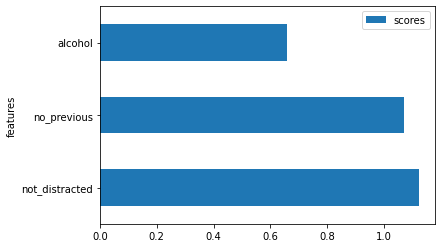

In [13]:
new_feat.plot(kind='barh',x='features',y='scores')

Select K Best

In [14]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [16]:
x=c.iloc[:,1:-1]
x[:2]

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,7.332,5.640,18.048,15.040,784.55,145.08
1,7.421,4.525,16.290,17.014,1053.48,133.93


In [17]:
y.head()

0    18.8
1    18.1
2    18.6
3    22.4
4    12.0
Name: total, dtype: float64

In [20]:
X_new = SelectKBest(mutual_info_regression, k=5).fit_transform(x, y)
X_new.shape

(51, 5)

In [21]:
feat_imp=SelectKBest(k=5)

In [22]:
feat_imp.fit(x,y)

SelectKBest(k=5)

In [23]:
feat_imp.n_features_in_

6

In [24]:
feat_imp.scores_

array([ 1.42351884,  1.63381622, 12.69030149, 30.72682165,  1.17976947,
        0.81917748])

In [28]:
df_imp=pd.DataFrame(feat_imp.scores_,columns=['scores'])
Df=pd.concat([df_imp,df_columns],axis=1)

In [29]:
Df

,scores,features
0,1.423519,speeding
1,1.633816,alcohol
2,12.690301,not_distracted
3,30.726822,no_previous
4,1.179769,ins_premium
5,0.819177,NaN


In [30]:
Df.nlargest(5,'scores')

,scores,features
3,30.726822,no_previous
2,12.690301,not_distracted
1,1.633816,alcohol
0,1.423519,speeding
4,1.179769,ins_premium


In [32]:
new_f=Df.nlargest(5,'scores').features.tolist()

In [33]:
X_new=c.loc[:,new_f]

In [34]:
X_new.head()

,no_previous,not_distracted,alcohol,speeding,ins_premium
0,15.040,18.048,5.640,7.332,784.55
1,17.014,16.290,4.525,7.421,1053.48
2,17.856,15.624,5.208,6.510,899.47
3,21.280,21.056,5.824,4.032,827.34
4,10.680,10.920,3.360,4.200,878.41


<Axes: >

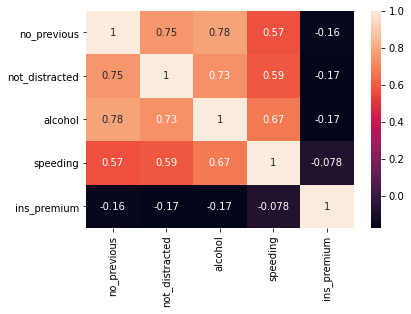

In [35]:
sns.heatmap(X_new.corr(),annot=True)

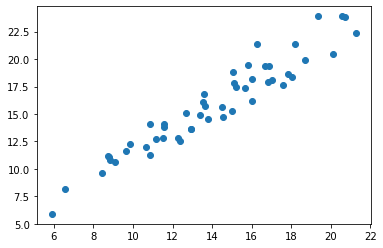

In [36]:
plt.scatter(c.no_previous,c.total)

Feature Importance

In [37]:
from sklearn.ensemble import ExtraTreesRegressor


In [38]:
model=ExtraTreesRegressor()

In [39]:
model.fit(x,y)

ExtraTreesRegressor()

In [40]:
score=model.feature_importances_
score

array([0.02685667, 0.18746873, 0.27780252, 0.48507444, 0.01207669,
       0.01072095])

In [42]:
rankedd_feature=pd.Series(score,index=x.columns)

In [43]:
rankedd_feature

speeding          0.026857
alcohol           0.187469
not_distracted    0.277803
no_previous       0.485074
ins_premium       0.012077
ins_losses        0.010721
dtype: float64

In [44]:
rankedd_feature.nlargest(5)

no_previous       0.485074
not_distracted    0.277803
alcohol           0.187469
speeding          0.026857
ins_premium       0.012077
dtype: float64

<Axes: >

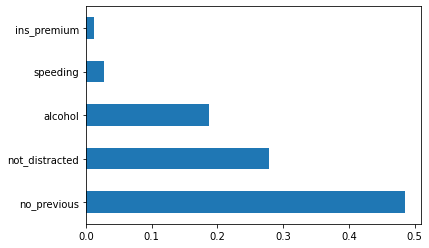

In [46]:
rankedd_feature.nlargest(5).plot(kind='barh',)

In [47]:
from sklearn.feature_selection import RFE


In [48]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [49]:
select =RFE(estimator=model,n_features_to_select=5)

In [50]:
select.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [51]:
out=select.support_

In [52]:
out

array([ True,  True,  True,  True, False,  True])

In [53]:
select.ranking_

array([1, 1, 1, 1, 2, 1])

In [55]:
new_df=x.loc[:,out]
new_df

,speeding,alcohol,not_distracted,no_previous,ins_losses
0,7.332,5.640,18.048,15.040,145.08
1,7.421,4.525,16.290,17.014,133.93
2,6.510,5.208,15.624,17.856,110.35
3,4.032,5.824,21.056,21.280,142.39
4,4.200,3.360,10.920,10.680,165.63
5,5.032,3.808,10.744,12.920,139.91
6,4.968,3.888,9.396,8.856,167.02
7,6.156,4.860,14.094,16.038,151.48
8,2.006,1.593,5.900,5.900,136.05
9,3.759,5.191,16.468,16.826,144.18
